In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import anderson,shapiro,median_abs_deviation
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans,KMeans,Birch,AgglomerativeClustering,DBSCAN
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,calinski_harabasz_score,pairwise_distances,davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
# Read the CSV file
df = pd.read_csv("dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


**Each row in the Spotify track dataset represents the information of a single song from Spotify. The dataset includes identification information such as track_id, track_name, artists... and various audio features like danceability, energy, loudness, speechiness...**

In [3]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 21 columns


In [4]:
#Information about dataset.
groups = df["track_genre"].value_counts()
groups = sorted(groups.keys())
for group in groups:
    print(group)

acoustic
afrobeat
alt-rock
alternative
ambient
anime
black-metal
bluegrass
blues
brazil
breakbeat
british
cantopop
chicago-house
children
chill
classical
club
comedy
country
dance
dancehall
death-metal
deep-house
detroit-techno
disco
disney
drum-and-bass
dub
dubstep
edm
electro
electronic
emo
folk
forro
french
funk
garage
german
gospel
goth
grindcore
groove
grunge
guitar
happy
hard-rock
hardcore
hardstyle
heavy-metal
hip-hop
honky-tonk
house
idm
indian
indie
indie-pop
industrial
iranian
j-dance
j-idol
j-pop
j-rock
jazz
k-pop
kids
latin
latino
malay
mandopop
metal
metalcore
minimal-techno
mpb
new-age
opera
pagode
party
piano
pop
pop-film
power-pop
progressive-house
psych-rock
punk
punk-rock
r-n-b
reggae
reggaeton
rock
rock-n-roll
rockabilly
romance
sad
salsa
samba
sertanejo
show-tunes
singer-songwriter
ska
sleep
songwriter
soul
spanish
study
swedish
synth-pop
tango
techno
trance
trip-hop
turkish
world-music


In [5]:
# Calculate the number of missing values in each column
nanvalues = df.isna().sum()
# Remove rows containing missing values
nanvalues

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.dropna()

We will check for the number of duplicated rows (rows that have the same values in all columns) and if any are found, we will drop them.
- There is a piece of music that appears in multiple albums simultaneously, which is not suitable for the dataset.
- Having the same music appearing in multiple albums simultaneously may lead to data inconsistency.
- This process ensures that there are no multiple entries with the same artist and track name in the dataset.

In [7]:
# Remove duplicates based on the 'track_id' column, keeping the first observation
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

# Convert values in the 'track_name' column to lowercase
df['track_name'] = df['track_name'].str.lower()

# Remove duplicates based on the combination of 'artists' and 'track_name' columns, keeping the first observation
df.drop_duplicates(subset=['artists', 'track_name'], keep='first', inplace=True)

# Resetting the index of the DataFrame
df = df.drop("Unnamed: 0",axis=1)
df = df.reset_index(drop=True)
df

C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_17060\37055820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)
C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_17060\37055820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_name'] = df['track_name'].str.lower()
C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_17060\37055820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),ghost - acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,to begin again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,can't help falling in love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,hold on,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,sleep my little boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
81202,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,water into light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
81203,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,miss perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
81204,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# What is the meaning of each column?


| Column            | Description                                                                                      |
|-------------------|--------------------------------------------------------------------------------------------------|
| track_id          | The Spotify ID for the track                                                                      |
| artists           | The names of the artists who performed the track, separated by ';' if there is more than one     |
| album_name        | The name of the album in which the track appears                                                   |
| track_name        | The name of the track                                                                             |
| popularity        | The popularity of the track on a scale from 0 to 100, based on the total number of plays and recency |
| duration_ms       | The length of the track in milliseconds                                                           |
| explicit          | Indicates whether the track has explicit lyrics (true = yes, false = no or unknown)              |
| danceability      | Describes how suitable a track is for dancing, with 0.0 being least danceable and 1.0 being most danceable |
| energy            | A measure from 0.0 to 1.0 representing the intensity and activity of the track                 |
| key               | The key the track is in, mapped to pitches using standard Pitch Class notation                  |
| loudness          | The overall loudness of the track in decibels (dB)                                                |
| mode              | Indicates the modality (major = 1, minor = 0) of a track's melodic content                      |
| speechiness       | Detects the presence of spoken words in a track, with values above 0.66 likely indicating spoken words |
| acousticness      | A confidence measure from 0.0 to 1.0 of whether the track is acoustic                            |
| instrumentalness  | Predicts whether a track contains no vocals, with values closer to 1.0 indicating instrumental tracks |
| liveness          | Detects the presence of an audience in the recording, with higher values indicating a greater likelihood of a live performance |
| valence           | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track               |
| tempo             | The overall estimated tempo of a track in beats per minute (BPM)                                 |
| time_signature    | An estimated time signature, indicating how many beats are in each bar                            |
| track_genre       | The genre in which the track belongs                                                               |


# What is the data types of each column?

In [8]:
df.dtypes.to_frame('Data Type')

,Data Type
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


# What is the distribution of each feature?

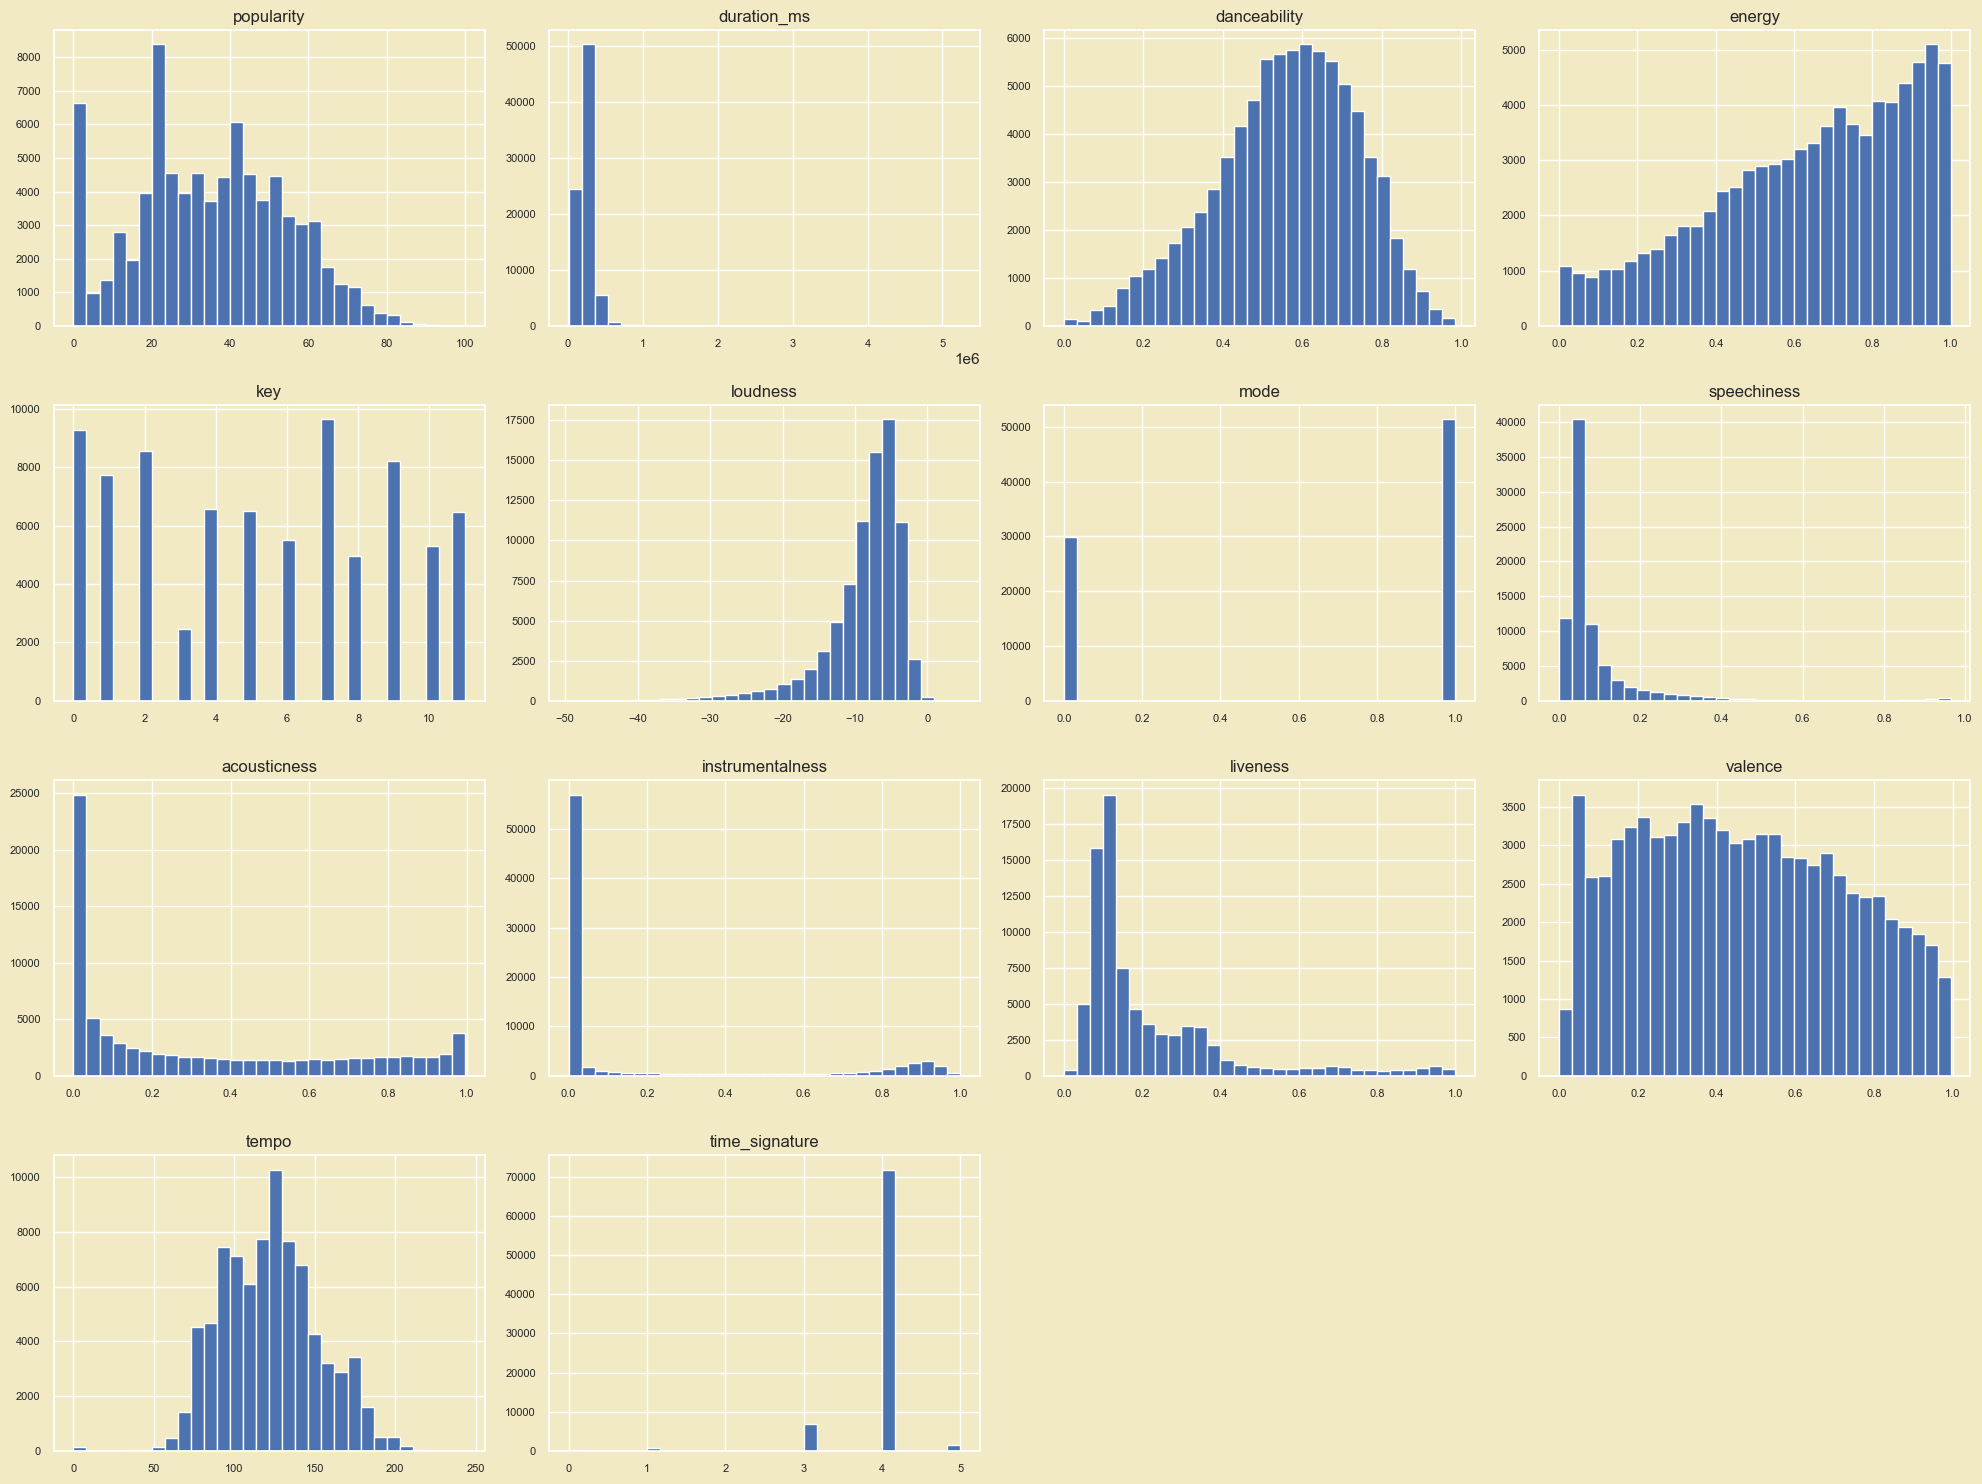

In [9]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
df.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

- **Danceability, Tempo, Valence:**
  - These columns exhibit distributions close to normal.
  
- **Loudness:**
  - It has a left-skewed distribution, primarily encompassing songs with noise levels ranging from -15 to -5 dB.

- **Speechiness, Acousticness, Instrumentalness, Liveness:**
  - These columns showcase right-skewed distributions, mostly comprising songs with low values.

- **Popularity:**
  - Many songs have a popularity value of 0; the rest display a distribution close to normal.

- **Duration_ms:**
  - This column demonstrates a right-skewed distribution, with most songs having a duration of less than 500,000 ms (8 minutes) and the longest around 5 million ms (83 minutes).

- **Energy:**
  - It exhibits an increasing distribution from 0 to 1, mainly encompassing songs with values from 0.4 to 0.9.

- **Key:**
  - Ranging from 0 to 11, this column shows distinct values distributed fairly evenly.

- **Mode:**
  - Having 2 values, 0 and 1, with 1 dominating by nearly double the frequency of 0.

- **Time_Signature:**
  - A majority of songs have a time signature value of 5.

- **Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence:**
  - All these columns have minimum values of 0 and maximum values of 1.


# What is the K-S statistic and p-value of each column?

In [10]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number) and not np.issubdtype(df[col].dtype, np.str_):
        kstest_result = stats.kstest(df[col], 'norm')

        # Print the test statistic and p-value for each column
        print(f"{col} - K-S test statistic:", kstest_result.statistic)
        print(f"{col} - p-value:", kstest_result.pvalue)

popularity - K-S test statistic: 0.9195303324932079
popularity - p-value: 0.0
duration_ms - K-S test statistic: 1.0
duration_ms - p-value: 0.0
danceability - K-S test statistic: 0.5439787700053559
danceability - p-value: 0.0
energy - K-S test statistic: 0.504951840006431
energy - p-value: 0.0
key - K-S test statistic: 0.7677087011429717
key - p-value: 0.0
loudness - K-S test statistic: 0.9663415019097887
loudness - p-value: 0.0
mode - K-S test statistic: 0.5
mode - p-value: 0.0
speechiness - K-S test statistic: 0.507192251402711
speechiness - p-value: 0.0
acousticness - K-S test statistic: 0.5
acousticness - p-value: 0.0
instrumentalness - K-S test statistic: 0.5
instrumentalness - p-value: 0.0
liveness - K-S test statistic: 0.5088075487886229
liveness - p-value: 0.0
valence - K-S test statistic: 0.5044494262414649
valence - p-value: 0.0
tempo - K-S test statistic: 0.998214417653868
tempo - p-value: 0.0
time_signature - K-S test statistic: 0.9872593180361482
time_signature - p-value: 0

Visually and statistically (p-value < 0.05) none of the numeric columns are normally distributed

### Check Variance

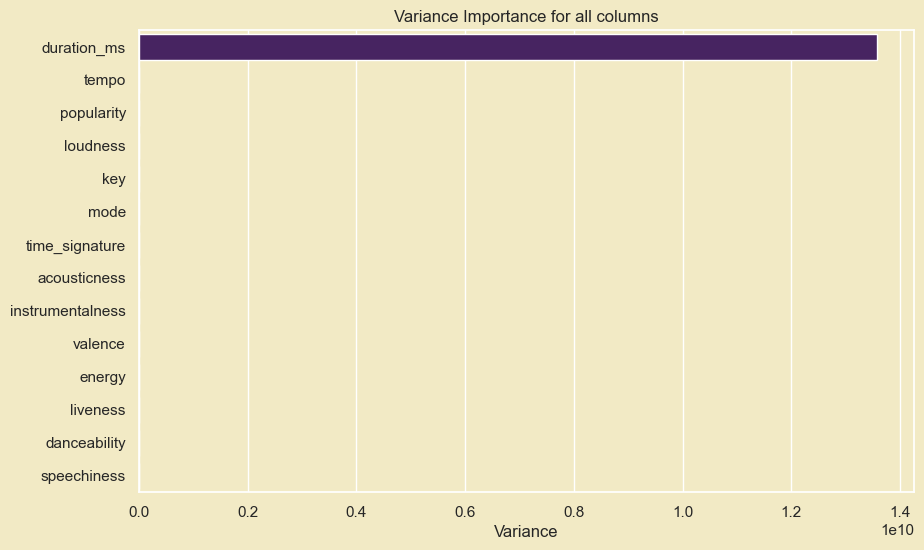

In [11]:
df_features = df.select_dtypes(include=['number'])

# Calculate variances for numerical columns
variances = df_features.var()

# Sort variances in descending order
sorted_variances = variances.sort_values(ascending=False)

# Plotting the variances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_variances.values, y=sorted_variances.index, palette="viridis")
plt.xlabel('Variance')
plt.title('Variance Importance for all columns')
plt.show()

# Cleaning and Scaling 

In [12]:
#df=df.drop("explicit",axis=1)
#df=df.drop("duration_ms",axis=1)
#We dont use these columns.

In [13]:
def checkNormal(df, name):
    # Visualizes the distribution of the specified column
    sns.histplot(df[name], kde=True)
    plt.title(f'Distribution of {name}')
    return plt.show()

def Zscore(df, name):
    # Detects outliers using Z-score method
    zScore = stats.zscore(df[name])
    threshold = 3
    outliers = df[name][abs(zScore) > threshold]
    return df.drop(df[df[name].isin(outliers)].index)

def IQR(df, name):
    # Detects outliers using Interquartile Range (IQR) method
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)  
    IQR = Q3 - Q1
    LowerFence = Q1 - 1.5 * IQR
    UpperFence = Q3 + 1.5 * IQR
    return df.drop(df[(df[name] < LowerFence) | (df[name] > UpperFence)].index)

def Robust(df, name):
    # Detects outliers using Robust Z-score method
    median = df[name].median()
    mad = median_abs_deviation(df[name])
    robust_z_scores = (df[name] - median) / mad
    threshold = 4
    outliers = df[name][abs(robust_z_scores) > threshold]    
    return df.drop(outliers.index)

In [14]:
df = Robust(df, "popularity") 
df = Robust(df, "danceability") 
df = IQR(df, "speechiness") 
df = Zscore(df, "instrumentalness") 
df = Robust(df, "liveness")
df = Zscore(df, "valence")
df = Zscore(df, "tempo")

In [15]:
print(df['track_id'].nunique(), df.shape)

57979 (57979, 20)


In [16]:
columnNameMinMax = ["tempo","popularity","duration_ms"]

#Do Min-Max Scaling
def ScalingMinMax(df,columnNameMinMax):    
    min_max_scaler = preprocessing.MinMaxScaler()
    for name in columnNameMinMax:
         array = np.array(df[name])
         reshapedArray = array.reshape(-1, 1)
         df[name] = min_max_scaler.fit_transform(reshapedArray)
    return df

#Do Standart Scaling
def ScalingStandart(df,columnsNameStandart):
    scaler = StandardScaler()
    for name in columnsNameStandart:
         array = np.array(df[name])
         reshapedArray = array.reshape(-1, 1)
         df[name] = scaler.fit_transform(reshapedArray)
    return df

columnsNameStandart = ["danceability","instrumentalness","key"]
ScalingMinMax(df, columnNameMinMax)
ScalingStandart(df, columnsNameStandart)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),ghost - acoustic,0.604396,0.025318,False,-0.817713,0.1660,-1.203856,-17.235,1,0.0763,0.924,-0.596531,0.1010,0.2670,0.241824,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,to begin again,0.626374,0.037046,False,-0.713714,0.3590,-1.485455,-9.734,1,0.0557,0.210,-0.596547,0.1170,0.1200,0.235115,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,can't help falling in love,0.780220,0.035342,False,-1.707485,0.0596,-1.485455,-18.515,1,0.0363,0.905,-0.596344,0.1320,0.1430,0.846406,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,hold on,0.901099,0.034752,False,0.326280,0.4430,-0.922256,-9.681,1,0.0526,0.469,-0.596547,0.0829,0.1670,0.488062,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,days i will remember,0.637363,0.037700,False,0.730721,0.4810,0.204141,-8.807,1,0.1050,0.289,-0.596547,0.1890,0.6660,0.360872,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,sleep my little boy,0.230769,0.070413,False,-2.250592,0.2350,-0.077458,-16.393,1,0.0422,0.640,2.078230,0.0863,0.0339,0.523125,5,world-music
81202,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,water into light,0.241758,0.070413,False,-2.239037,0.1170,-1.485455,-18.318,0,0.0401,0.994,2.216580,0.1050,0.0350,0.286769,4,world-music
81203,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,miss perfumado,0.241758,0.048663,False,0.389835,0.3290,-1.485455,-10.895,0,0.0420,0.867,-0.596547,0.0839,0.7430,0.560142,4,world-music
81204,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,friends,0.450549,0.051044,False,0.147170,0.5060,0.485741,-10.889,1,0.0297,0.381,-0.596547,0.2700,0.4130,0.580915,4,world-music


In [17]:
# Explict column transform to binary.
df["explicit"] = df["explicit"].astype(str)
df['explicit'] = df['explicit'].map({'True': 1, 'False': 0})

In [18]:
#Df have many duplicates drop them but one of them must stay.
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)
# Error 1 = There is one music but this music has one more album in same time so it is bad for data.
df['track_name'] = df['track_name'].str.lower()
# Error 2 = The names of some music are the same, 
#but only written in a few uppercase letters and some lowercase letters, 
#which is a bad mistake for uniqueness.
df.drop_duplicates(subset=['artists', 'track_name'], keep='first', inplace=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),ghost - acoustic,0.604396,0.025318,0,-0.817713,0.1660,-1.203856,-17.235,1,0.0763,0.924,-0.596531,0.1010,0.2670,0.241824,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,to begin again,0.626374,0.037046,0,-0.713714,0.3590,-1.485455,-9.734,1,0.0557,0.210,-0.596547,0.1170,0.1200,0.235115,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,can't help falling in love,0.780220,0.035342,0,-1.707485,0.0596,-1.485455,-18.515,1,0.0363,0.905,-0.596344,0.1320,0.1430,0.846406,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,hold on,0.901099,0.034752,0,0.326280,0.4430,-0.922256,-9.681,1,0.0526,0.469,-0.596547,0.0829,0.1670,0.488062,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,days i will remember,0.637363,0.037700,0,0.730721,0.4810,0.204141,-8.807,1,0.1050,0.289,-0.596547,0.1890,0.6660,0.360872,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,sleep my little boy,0.230769,0.070413,0,-2.250592,0.2350,-0.077458,-16.393,1,0.0422,0.640,2.078230,0.0863,0.0339,0.523125,5,world-music
81202,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,water into light,0.241758,0.070413,0,-2.239037,0.1170,-1.485455,-18.318,0,0.0401,0.994,2.216580,0.1050,0.0350,0.286769,4,world-music
81203,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,miss perfumado,0.241758,0.048663,0,0.389835,0.3290,-1.485455,-10.895,0,0.0420,0.867,-0.596547,0.0839,0.7430,0.560142,4,world-music
81204,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,friends,0.450549,0.051044,0,0.147170,0.5060,0.485741,-10.889,1,0.0297,0.381,-0.596547,0.2700,0.4130,0.580915,4,world-music


# Visualization 

## Variance of each feature

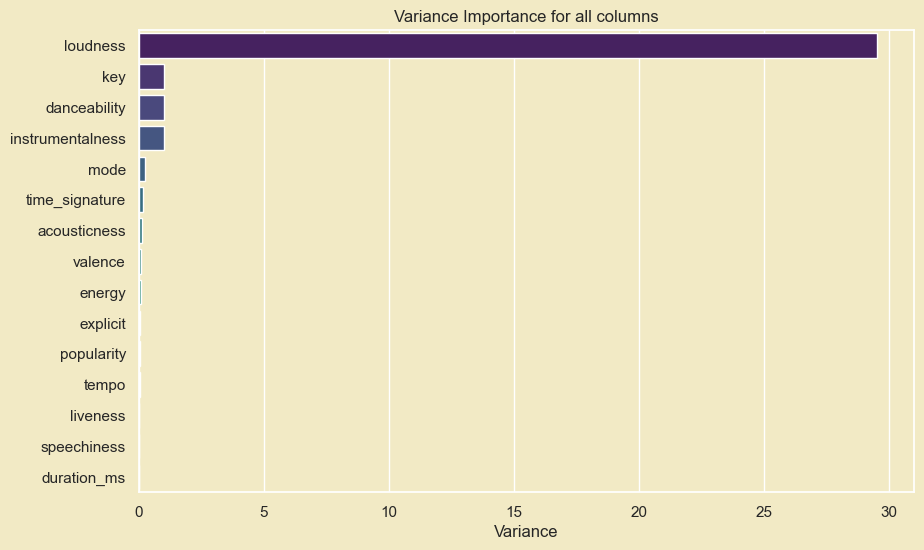

In [19]:
df_features = df.select_dtypes(include=['number'])

# Calculate variances for numerical columns
variances = df_features.var()

# Sort variances in descending order
sorted_variances = variances.sort_values(ascending=False)

# Plotting the variances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_variances.values, y=sorted_variances.index, palette="viridis")
plt.xlabel('Variance')
plt.title('Variance Importance for all columns')
plt.show()

## Top 10 Artists with the Most Songs


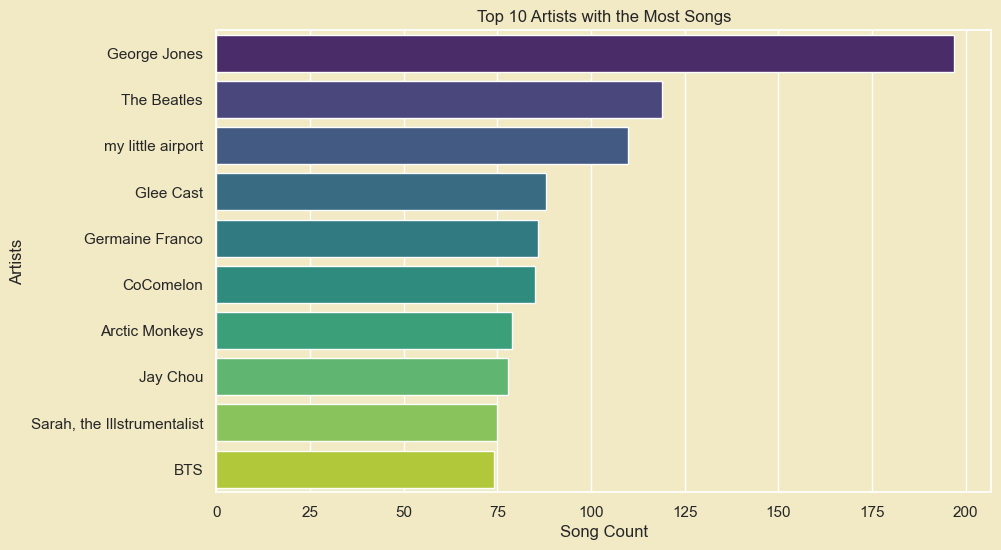

In [20]:
ArtistsSong = df["artists"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ArtistsSong.values, y=ArtistsSong.index, palette='viridis')
plt.xlabel('Song Count')
plt.ylabel('Artists')
plt.title('Top 10 Artists with the Most Songs')
plt.show()

# Genres Word Cloud


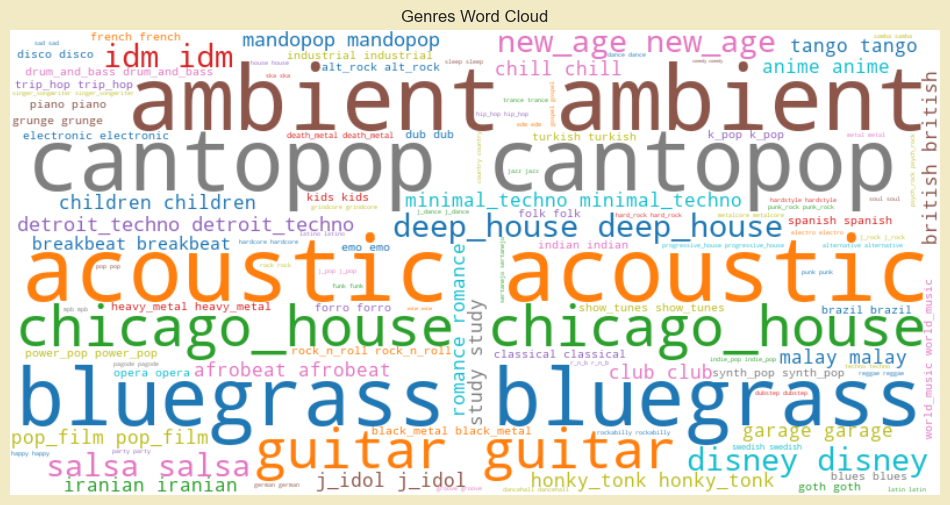

In [21]:
genres = df["track_genre"].str.replace('-', '_')
GenresFre = genres.value_counts()
text =" ".join(genres)
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="tab10").generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Genres Word Cloud')
plt.show()

# Top 10 artists with average popularity

In [22]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')
top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists[:10]

Series([], Name: popularity, dtype: float64)

# Example Question 
How do different genre-related characteristics affect the popularity of songs?

#### How to solve:
**Analyzing genre-related characteristics:**

- Number of songs for each top 10 genre.

- Average popularity score for each genre.

- Genres in the top ~58 most popular songs.

**Number of genres in dataset**

In [23]:
genres = df["track_genre"].nunique()
genres

113

**Top 10 genres with the highest number of songs**


The analysis's goal is to identify the genre or genres that authors most frequently choose to write in.Get the frequency of every value in the **track_genre** column, identify the top ten genres based on frequency, and display the outcomes.

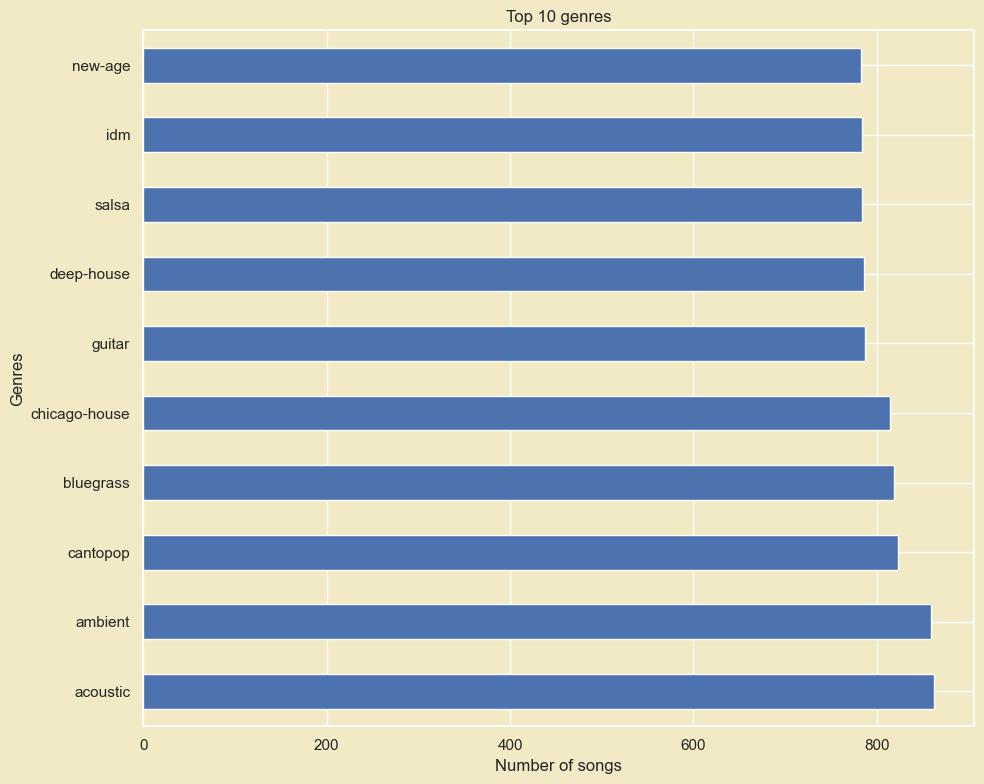

In [24]:
genre_counts = df['track_genre'].value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 8))
top_10_genres.plot(kind='barh')
plt.title('Top 10 genres')
plt.xlabel('Number of songs')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

**Which genre has the highest number of songs in the top 0.001% most popular songs?**

Finding the most common genre among the top-ranked hit songs is the aim of the analysis.

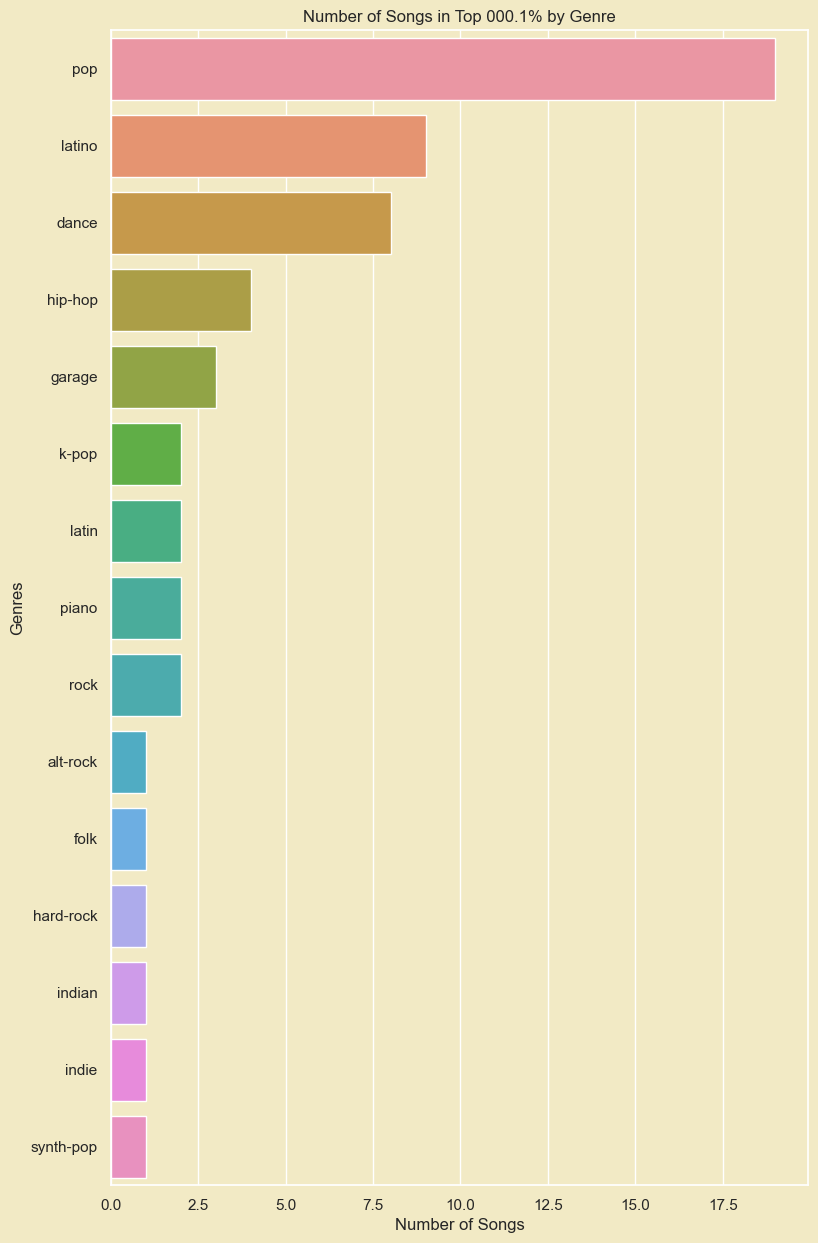

In [25]:
# Sort the data by popularity and select the top 000.1%
df_sorted = df.sort_values(by='popularity', ascending=False)
top_001_percent = df_sorted.head(int(0.001 * len(df_sorted)))

# Find the count of songs in each genre
top_genres_count = top_001_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

# Find the genre with the most songs
most_common_genre = top_genres_count.iloc[0]

# Visualization
plt.figure(figsize=(9,15))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 000.1% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genres')
plt.show()

- The data indicates that within the top 0.001% of popular songs, there is a notable range of genres. But pop is a genre that differs greatly from the others.
- One of the most well-liked musical subgenres globally is pop. Pop music appeals to a wide range of listeners by incorporating elements from several genres, including dance, hip-hop, rock, and R&B.
- Pop songs frequently have robust marketing and promotion campaigns behind them. Their significant presence on television, streaming services, and other media outlets increases their visibility and garners public gratitude.


**Which genre has the highest average popularity score?**

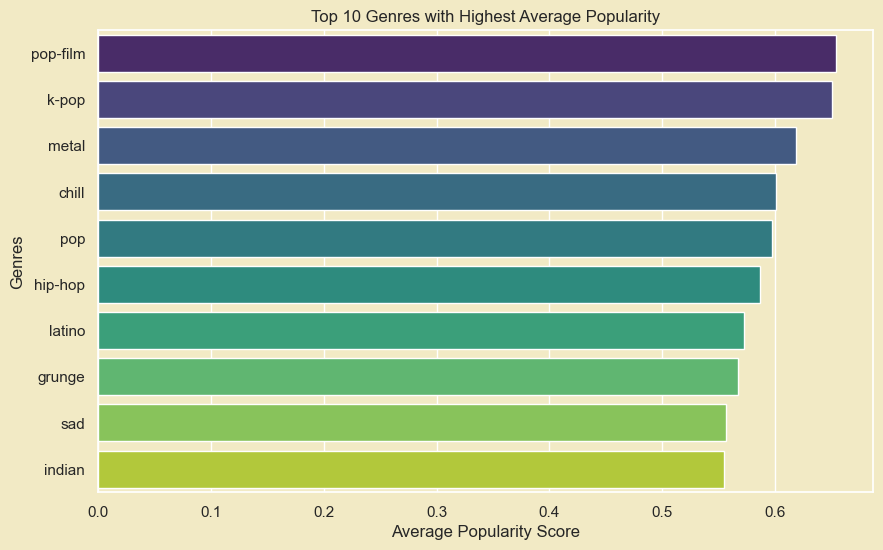

In [26]:
# Calculate the average popularity by genre using grouping
average_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

# Select the top 10 genres based on popularity average
top_10 = average_popularity_by_genre.nlargest(10, 'popularity')

plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top_10, palette='viridis')
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Average Popularity Score')
plt.ylabel('Genres')
plt.show()


# Analysis Results

After analysis and visualization, several conclusions have been reached:

## Top Genres

- Genres like pop-film, k-pop, metal, and chill exhibit the highest average popularity.
- Among approximately 58 songs, the pop genre stands out more than others.

## Impact of Different Genre Characteristics

How do different genre-related characteristics affect the popularity of songs?

Answering this question requires looking at it from various perspectives. The popularity score indicates music listeners' preferences. However, diving deeper into details, especially among the top-ranked songs, highlights how the pop genre surpasses others. Pop constitutes approximately 1/5 of the top songs.
In general, considering the popularity of songs, there exists an audience preference for energetic performances like pop.
There's no single correct answer to the question posed by our group. Each viewpoint provides different responses suitable for that particular aspect. After this analysis, we hope that artists can create hits with broader popularity.


# Preparing for Prediction

In [27]:
dfGenres = df["track_genre"]
dfTrackId = df["track_id"]
dfTrackName = df["track_name"]
dfTurkish = df[df["track_genre"]=="turkish"]
dfArtists = df["artists"]
dfAlbum = df["album_name"]

In [28]:
#Drop non-numeric column.
df = df.drop(["track_id","album_name","track_name","artists"],axis=1)
#We analyze numeric columns.

In [29]:
# Applying a hash function to convert values in the 'track_genre' column
df['track_genre'] = df['track_genre'].apply(lambda x: hash(''.join(x)))

# Scaling the hashed values using Min-Max scaler
scaler = MinMaxScaler(feature_range=(0, 10000))
df['track_genre'] = scaler.fit_transform(df[['track_genre']])

# Hashes the values in the 'track_genre' column to transform them.
# Then, applies Min-Max scaling to the hashed values.

In [30]:
df = pd.concat([dfArtists,df],axis=1)

In [31]:
#To find the names containing ";" in the artist name in the dataset, 
#Remove the ";" sign and assign the artist names separately.
def merge_names(names):
    if ';' in names:
        # Process names separated by semicolons
        name_list = names.split(';')
        merged_names = []
        for name in name_list:
            # Concatenate names and surnames removing spaces
            merged_names.append(''.join(name.split()))
        return ''.join(merged_names)
    else:
        # Concatenate names removing spaces if there is a single name
        return ''.join(names.split())

# Applying the merge_names function to the 'artists' column
df['artists'] = df['artists'].apply(merge_names)

# Replace each artist name with a unique numerical value
df['artists'] = df['artists'].apply(lambda x: hash(''.join(x)))

# Scaling the 'artists' column using Min-Max scaler.
scaler = MinMaxScaler(feature_range=(0, 400))
df['artists'] = scaler.fit_transform(df[['artists']])
df

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,343.579555,0.604396,0.025318,0,-0.817713,0.1660,-1.203856,-17.235,1,0.0763,0.924,-0.596531,0.1010,0.2670,0.241824,4,7361.371240
2,225.232845,0.626374,0.037046,0,-0.713714,0.3590,-1.485455,-9.734,1,0.0557,0.210,-0.596547,0.1170,0.1200,0.235115,4,7361.371240
3,377.673108,0.780220,0.035342,0,-1.707485,0.0596,-1.485455,-18.515,1,0.0363,0.905,-0.596344,0.1320,0.1430,0.846406,3,7361.371240
4,261.309312,0.901099,0.034752,0,0.326280,0.4430,-0.922256,-9.681,1,0.0526,0.469,-0.596547,0.0829,0.1670,0.488062,4,7361.371240
5,396.031777,0.637363,0.037700,0,0.730721,0.4810,0.204141,-8.807,1,0.1050,0.289,-0.596547,0.1890,0.6660,0.360872,4,7361.371240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,248.790650,0.230769,0.070413,0,-2.250592,0.2350,-0.077458,-16.393,1,0.0422,0.640,2.078230,0.0863,0.0339,0.523125,5,8975.419387
81202,248.790650,0.241758,0.070413,0,-2.239037,0.1170,-1.485455,-18.318,0,0.0401,0.994,2.216580,0.1050,0.0350,0.286769,4,8975.419387
81203,259.678229,0.241758,0.048663,0,0.389835,0.3290,-1.485455,-10.895,0,0.0420,0.867,-0.596547,0.0839,0.7430,0.560142,4,8975.419387
81204,34.478496,0.450549,0.051044,0,0.147170,0.5060,0.485741,-10.889,1,0.0297,0.381,-0.596547,0.2700,0.4130,0.580915,4,8975.419387


In [32]:
#Finding best correlation between the features.
def corrResult(min_corr, max_corr, data):
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i != j:
                corr_1 = data[data.columns[i]].corr(data[data.columns[j]], method="spearman")
                abs_corr = np.abs(corr_1)
                if abs_corr < min_corr:
                    continue
                elif abs_corr > max_corr and corr_1 > 0:
                    print(data.columns[i], "and", data.columns[j], "are highly correlated with a value of", corr_1)
 


In [33]:
corrResult(min_corr = 0.3, max_corr = 0.75, data = df)

energy and loudness are highly correlated with a value of 0.7733197154103063
loudness and energy are highly correlated with a value of 0.7733197154103063


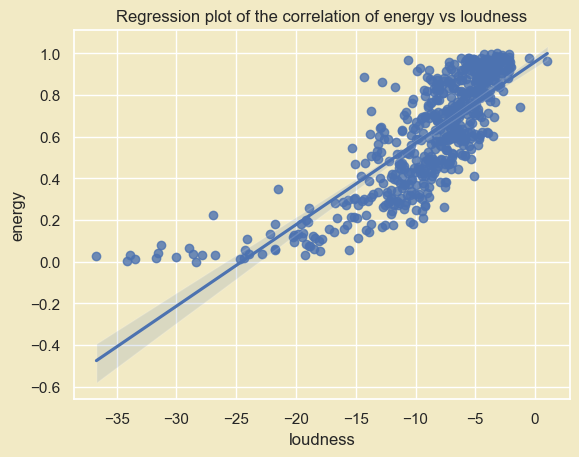

In [34]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, y="energy", x="loudness", color="b")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

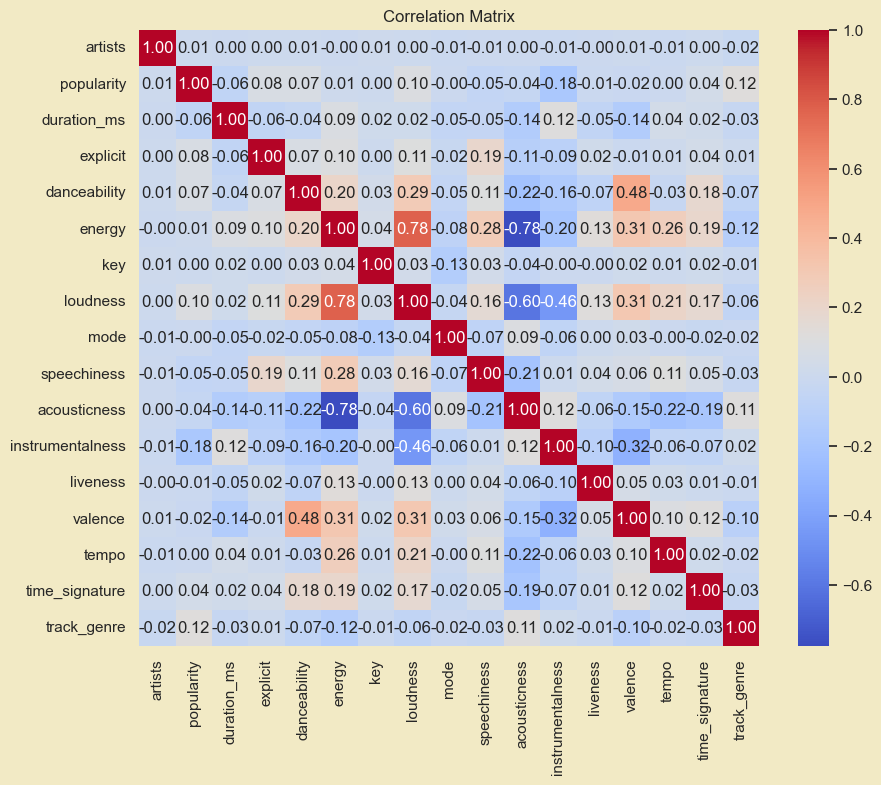

In [35]:
# Correlation matrix visualization.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:
#-------------PCA Algorithm.
dfEnergy = df["energy"]
dfAcousticness = df["loudness"]
PCAdf = df[["energy","loudness"]]
X = PCAdf.values
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
df["Eng-Loud"] = X_pca
df=df.drop(["energy","loudness"],axis=1)

In [37]:
df

,artists,popularity,duration_ms,explicit,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Eng-Loud
1,343.579555,0.604396,0.025318,0,-0.817713,-1.203856,1,0.0763,0.924,-0.596531,0.1010,0.2670,0.241824,4,7361.371240,8.295596
2,225.232845,0.626374,0.037046,0,-0.713714,-1.485455,1,0.0557,0.210,-0.596547,0.1170,0.1200,0.235115,4,7361.371240,0.792640
3,377.673108,0.780220,0.035342,0,-1.707485,-1.485455,1,0.0363,0.905,-0.596344,0.1320,0.1430,0.846406,3,7361.371240,9.578689
4,261.309312,0.901099,0.034752,0,0.326280,-0.922256,1,0.0526,0.469,-0.596547,0.0829,0.1670,0.488062,4,7361.371240,0.736522
5,396.031777,0.637363,0.037700,0,0.730721,0.204141,1,0.1050,0.289,-0.596547,0.1890,0.6660,0.360872,4,7361.371240,-0.138288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81201,248.790650,0.230769,0.070413,0,-2.250592,-0.077458,1,0.0422,0.640,2.078230,0.0863,0.0339,0.523125,5,8975.419387,7.451599
81202,248.790650,0.241758,0.070413,0,-2.239037,-1.485455,0,0.0401,0.994,2.216580,0.1050,0.0350,0.286769,4,8975.419387,9.379672
81203,259.678229,0.241758,0.048663,0,0.389835,-1.485455,0,0.0420,0.867,-0.596547,0.0839,0.7430,0.560142,4,8975.419387,1.953947
81204,34.478496,0.450549,0.051044,0,0.147170,0.485741,1,0.0297,0.381,-0.596547,0.2700,0.4130,0.580915,4,8975.419387,1.941304


In [38]:
#Finding least correlated column in dataset.
def find_least_correlated_column(df):
    correlation_matrix = df.corr()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    absolute_correlation = upper_triangle.abs()
    least_correlated_column = absolute_correlation.min().idxmin()
    return least_correlated_column

MinCorrelated = find_least_correlated_column(df)
MinCorrelated

'tempo'

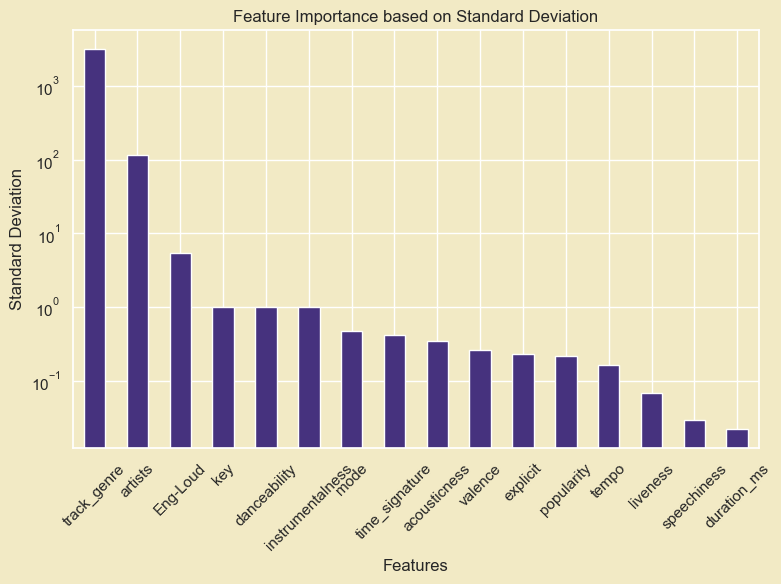

In [39]:
feature_importance = df.std()

# Set Seaborn palette to 'viridis'
sns.set_palette("viridis")

# Plotting feature importance on a logarithmic scale with 'viridis' palette
plt.figure(figsize=(8, 6))
ax = feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.title('Feature Importance based on Standard Deviation')
plt.xticks(rotation=45)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()

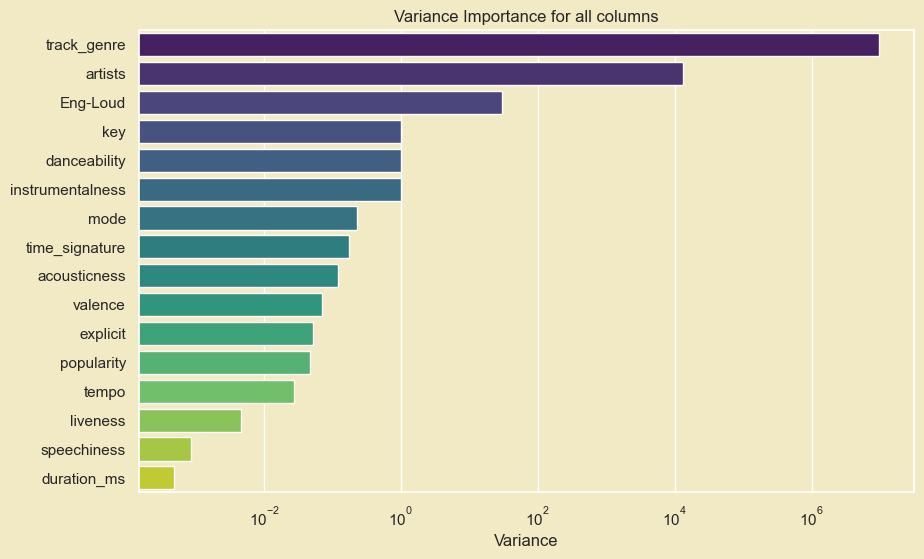

In [40]:
variances = df.var()
sorted_variances = variances.sort_values(ascending=False)
# Plotting variance importance for all columns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_variances, y=sorted_variances.index, palette="viridis")
plt.xlabel('Variance')
plt.title('Variance Importance for all columns')
# Set x-axis to exponential format (10^3)
ax.set_xscale('log')
plt.show()

# Clustering and Evaluation

In [41]:
# Concatenating three DataFrames: dfArtists, dfAlbum, and dfTrackName along columns
dfSelection = pd.concat([dfArtists, dfAlbum, dfTrackName], axis=1)
# Resetting the index of the concatenated DataFrame
dfSelection = dfSelection.reset_index(drop=True)
dfSelection


,artists,album_name,track_name
0,Ben Woodward,Ghost (Acoustic),ghost - acoustic
1,Ingrid Michaelson;ZAYN,To Begin Again,to begin again
2,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,can't help falling in love
3,Chord Overstreet,Hold On,hold on
4,Tyrone Wells,Days I Will Remember,days i will remember
...,...,...,...
57974,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,sleep my little boy
57975,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,water into light
57976,Cesária Evora,Best Of,miss perfumado
57977,Michael W. Smith,Change Your World,friends


In [42]:
df = df.reset_index(drop=True)
df


,artists,popularity,duration_ms,explicit,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Eng-Loud
0,343.579555,0.604396,0.025318,0,-0.817713,-1.203856,1,0.0763,0.924,-0.596531,0.1010,0.2670,0.241824,4,7361.371240,8.295596
1,225.232845,0.626374,0.037046,0,-0.713714,-1.485455,1,0.0557,0.210,-0.596547,0.1170,0.1200,0.235115,4,7361.371240,0.792640
2,377.673108,0.780220,0.035342,0,-1.707485,-1.485455,1,0.0363,0.905,-0.596344,0.1320,0.1430,0.846406,3,7361.371240,9.578689
3,261.309312,0.901099,0.034752,0,0.326280,-0.922256,1,0.0526,0.469,-0.596547,0.0829,0.1670,0.488062,4,7361.371240,0.736522
4,396.031777,0.637363,0.037700,0,0.730721,0.204141,1,0.1050,0.289,-0.596547,0.1890,0.6660,0.360872,4,7361.371240,-0.138288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57974,248.790650,0.230769,0.070413,0,-2.250592,-0.077458,1,0.0422,0.640,2.078230,0.0863,0.0339,0.523125,5,8975.419387,7.451599
57975,248.790650,0.241758,0.070413,0,-2.239037,-1.485455,0,0.0401,0.994,2.216580,0.1050,0.0350,0.286769,4,8975.419387,9.379672
57976,259.678229,0.241758,0.048663,0,0.389835,-1.485455,0,0.0420,0.867,-0.596547,0.0839,0.7430,0.560142,4,8975.419387,1.953947
57977,34.478496,0.450549,0.051044,0,0.147170,0.485741,1,0.0297,0.381,-0.596547,0.2700,0.4130,0.580915,4,8975.419387,1.941304


In [43]:
dfTrackName = dfTrackName.reset_index(drop=True)


In [44]:
# Assuming dfFeatures and dfLabels are defined properly
dfFeatures = df[:10000]
dfLabels = dfTrackName[:10000]
dfALL = pd.concat([dfFeatures, dfLabels], axis=1)

In [45]:
def getSong(df):
    # This function retrieves the index of a song based on provided Artist, Album, and Track names.
    
    # Example input values (commented out for function use)
    """
    Artists=input("Artist Name : ")
    Album=input("Album Name : ")
    Track=input("Track Name : ")
    """
    # Hardcoded example input values for demonstration
    Artists = "Adele"
    Album = "Skyfall"
    Track = "skyfall"
    
    try:
        # Finding the index where the given Artist, Album, and Track names match the DataFrame
        index = df[(df["artists"] == Artists) & (df["album_name"] == Album) & (df["track_name"] == Track)].index
        
        # Returning the index of the found song
        return index[0]
    except IndexError as e:
        # Handling the case when no matching song is found
        return e

# Get the index of the song based on provided criteria
inputIndex = getSong(dfSelection)

# Select the row corresponding to the obtained index in dfFeatures DataFrame
selectedIndex = dfFeatures.loc[inputIndex]

# Convert the selected row to a DataFrame and transpose it
inputsong = pd.DataFrame(selectedIndex).T


# Birch Algorithm


In [46]:
def BirchPrediction(inputsong, dfFeatures, dfLabels, n_clusters, branching_factor, threshold, method):
    brc = Birch(n_clusters=n_clusters, branching_factor=branching_factor, threshold=threshold)  
    brc.fit(dfFeatures)
    input_song_cluster = brc.predict(inputsong)
    cluster_features = dfFeatures[brc.labels_ == input_song_cluster[0]]
    
    if len(cluster_features) > 0:
        similarities = pairwise_distances(inputsong, cluster_features, metric=method)
        similarities = normalize(similarities)
        similar_indices = similarities.flatten().argsort()[::-1]
        closest_song_indices = similar_indices[1:6]  # Excluding the input song itself
        
        return closest_song_indices, brc.labels_
    else:
        return None, None

In [47]:
fixed_params = {
    'n_clusters': 120,  
    'branching_factor': 500,
    'threshold':.5,
    'method' : "euclidean"
}

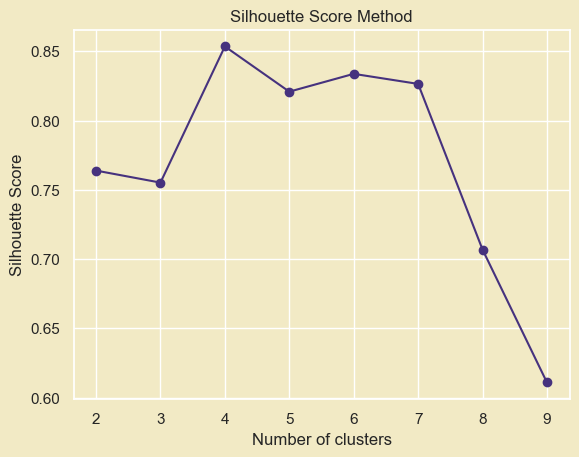

In [48]:
silhouette_scores = []
for n_clusters in range(2,10): 
    indexesBirchPrediction, labels = BirchPrediction(inputsong, dfFeatures, dfLabels,n_clusters,fixed_params["branching_factor"],fixed_params["threshold"],fixed_params["method"])
    silhouette_avg = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [49]:
fixed_params["n_clusters"] = 2

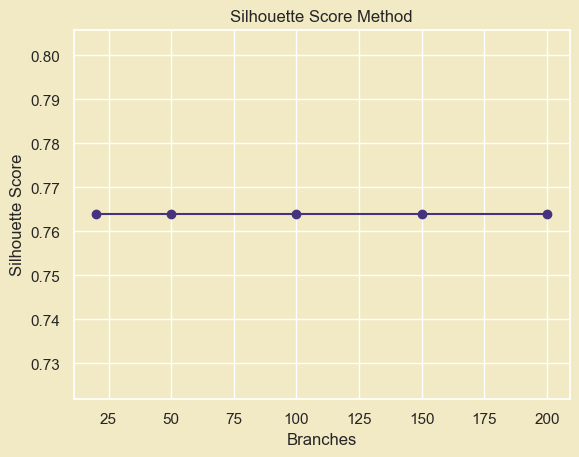

In [50]:
branches = [20,50,100,150,200]

silhouette_scores = []
for branch in branches : 
    indexesBirchPrediction, labels = BirchPrediction(inputsong, dfFeatures, dfLabels,
                                                     fixed_params["n_clusters"],
                                                     branch,
                                                     fixed_params["threshold"],
                                                     fixed_params["method"])
    silhouette_avg = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.plot(branches, silhouette_scores, marker='o')
plt.xlabel('Branches')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [51]:
fixed_params["branching_factor"] = 25

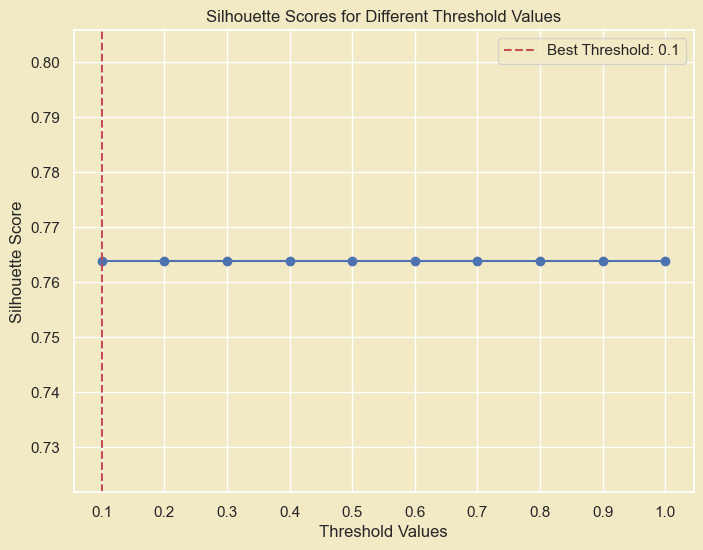

In [52]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mean_scores = []
silhouette_scores = []
for threshold in thresholds:
    indexesBirchPrediction, labels = BirchPrediction(inputsong, dfFeatures, dfLabels,
                                                     fixed_params["n_clusters"],
                                                     fixed_params["branching_factor"],
                                                     threshold,
                                                     fixed_params["method"])
    if labels is not None:
        silhouette_avg = silhouette_score(dfFeatures, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

best_threshold_idx = np.argmax(silhouette_scores)
best_threshold = thresholds[best_threshold_idx]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Threshold Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Threshold Values')
plt.xticks(thresholds)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
fixed_params["threshold"] = .6

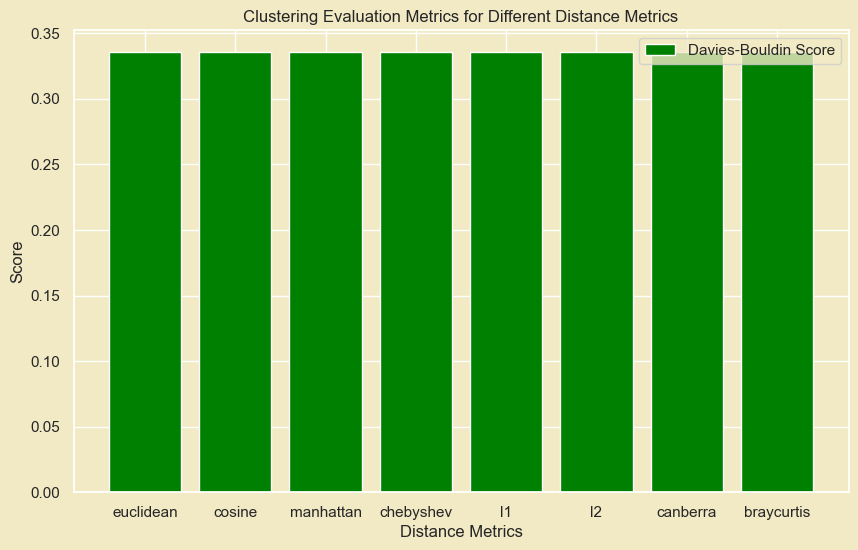

In [54]:
distance_metrics = ['euclidean', 'cosine', 'manhattan', 'chebyshev', 'l1', 'l2', 'canberra', 'braycurtis']
silhouette_scores = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

for metric in distance_metrics:
    indexesBirchPrediction, labels = BirchPrediction(inputsong, dfFeatures, dfLabels,
                                                     fixed_params["n_clusters"],
                                                     fixed_params["branching_factor"],
                                                     fixed_params["threshold"],
                                                     metric)
    
    if labels is not None:
        silhouette_avg = silhouette_score(dfFeatures, labels)
        silhouette_scores.append(silhouette_avg)
        
        calinski_avg = calinski_harabasz_score(dfFeatures, labels)
        calinski_scores.append(calinski_avg)
        
        davies_bouldin_avg = davies_bouldin_score(dfFeatures, labels)
        davies_bouldin_scores.append(davies_bouldin_avg)
    else:
        silhouette_scores.append(None)
        calinski_scores.append(None)
        davies_bouldin_scores.append(None)

plt.figure(figsize=(10, 6))


plt.bar(distance_metrics, davies_bouldin_scores, color='green', label='Davies-Bouldin Score')

plt.xlabel('Distance Metrics')
plt.ylabel('Score')
plt.title('Clustering Evaluation Metrics for Different Distance Metrics')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
indexesBirchPrediction, labels = BirchPrediction(inputsong, dfFeatures, dfLabels,
                                                 fixed_params["n_clusters"],
                                                 fixed_params["branching_factor"],
                                                 fixed_params["threshold"],
                                                 fixed_params["method"])

ClosestSongs = pd.DataFrame()
for i in indexesBirchPrediction:
    temp = dfSelection[dfSelection.index == i]
    ClosestSongs = pd.concat([temp, ClosestSongs]) 
    
print(ClosestSongs)

# Agglomerative Algorithm


In [55]:
def AgglomerativePrediction(inputsong, dfFeatures, numberclosest,n_clusters,metric,linkage):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
    cluster.fit(dfFeatures)
    cluster_labels = cluster.labels_
    input_song_cluster = cluster_labels[inputsong.index[0]]

    similar_songs_indexes = [index for index, label in enumerate(cluster_labels) if label == input_song_cluster and index != inputsong.index[0]]

    similarities = [(index, dfFeatures.iloc[inputsong.index[0]].corr(dfFeatures.iloc[index])) for index in similar_songs_indexes]
    similarities.sort(key=lambda x: x[1], reverse=True)

    closest_songs_indexes = [index for index, _ in similarities[:numberclosest]]

    return closest_songs_indexes,cluster_labels


In [56]:
fixed_params = {
    'n_clusters': 2,  
    'metric': "euclidean",
    'linkage': "ward"
}

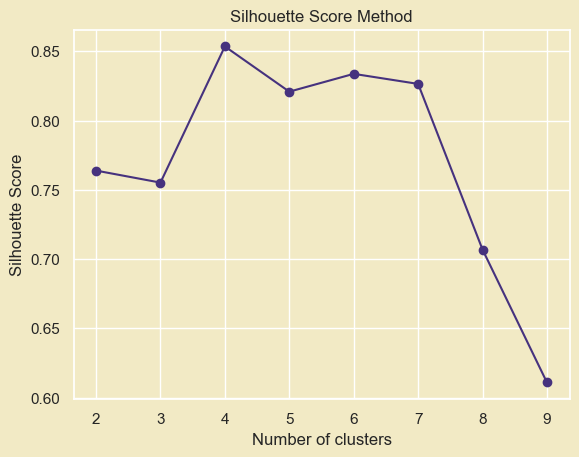

In [57]:
silhouette_scores = []
for fixed_params["n_clusters"] in range(2,10): 
    indexesAgglomerative, labels = AgglomerativePrediction(inputsong, dfFeatures, 5,
                                                     fixed_params["n_clusters"],
                                                     fixed_params["metric"],
                                                     fixed_params["linkage"])
    silhouette_avg = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [58]:
metrics = ['euclidean', 'manhattan', 'cosine', 'correlation', 'hamming', 'jaccard']
linkages = ['ward', 'complete', 'average', 'single']
silhouettes = {}
for metric in metrics:
    for linkage in linkages:
        try:
            indexesAgglomerative, labels = AgglomerativePrediction(inputsong, dfFeatures, 5,
                                                                  fixed_params["n_clusters"],
                                                                  metric,
                                                                  linkage)
            silhouette_avg = silhouette_score(dfFeatures, labels)
            names = f"{metric} - {linkage}"
            silhouettes[names] = silhouette_avg
        except:
            continue

best_combination, best_score = max(silhouettes.items(), key=lambda x: x[1])
print(f"Best metric-linkage combination: {best_combination}")
print(f"Its score is: {best_score}")

Best metric-linkage combination: euclidean - complete
Its score is: 0.638725516807447


In [ ]:
indexesAgglomerative, labels = AgglomerativePrediction(inputsong, dfFeatures, 5,
                                                     fixed_params["n_clusters"],
                                                     fixed_params["metric"],
                                                     fixed_params["linkage"])

ClosestSongs = pd.DataFrame()
for i in indexesAgglomerative:
    temp = dfSelection[dfSelection.index == i]
    ClosestSongs = pd.concat([temp, ClosestSongs]) 
    
print(ClosestSongs)

# KMeans

In [59]:
def KmeansPrediction(inputsong,dfFeatures,dfLabels,number,n_clusters,random_state,n_init):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init, init='k-means++')
    kmeans.fit(dfFeatures)
    clusterofInput = kmeans.predict(inputsong)
    cluster_songs_indices = (kmeans.labels_ == clusterofInput[0])
    cluster_songs_indices = cluster_songs_indices & ~(dfFeatures.index == inputsong.index[0])
    cluster_songs = dfLabels[cluster_songs_indices]
    distances = euclidean_distances(inputsong, dfFeatures[cluster_songs_indices].values)
    closest_song_indices = distances.argsort()[0]
    closest_songs = cluster_songs.iloc[closest_song_indices[:number]]
    return closest_songs.index, kmeans.labels_ ,kmeans.inertia_

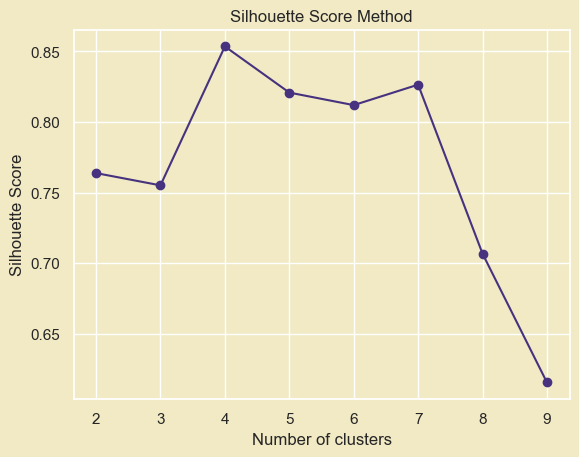

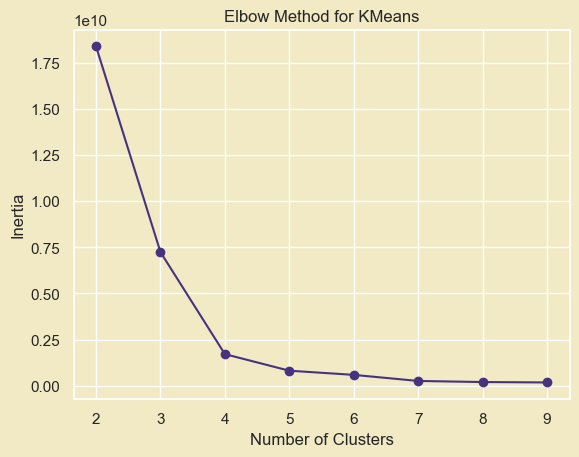

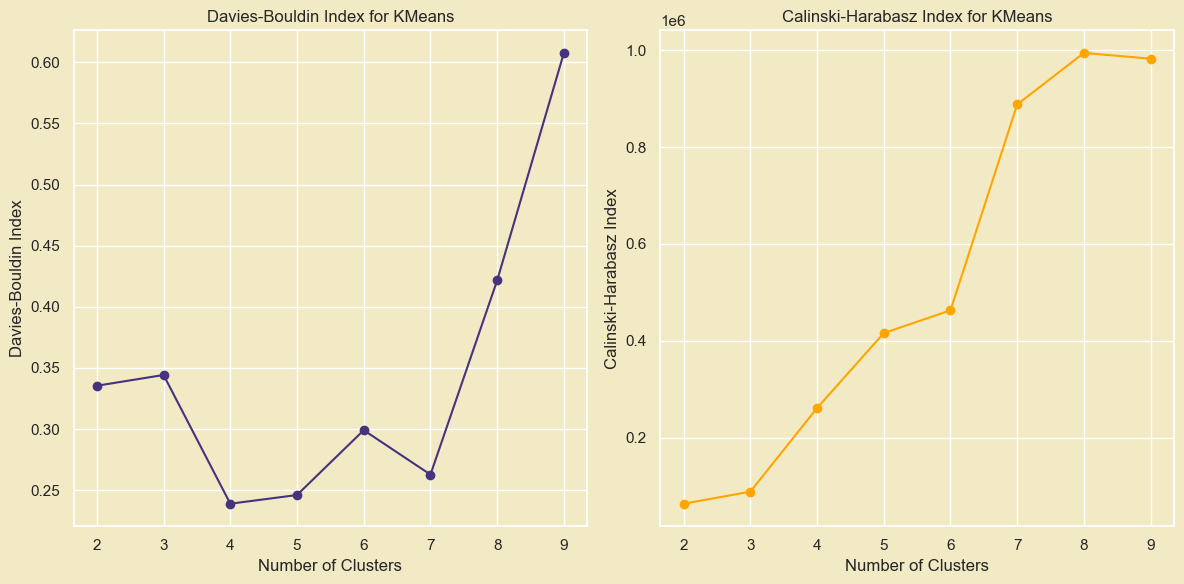

In [60]:
fixed_params = {
    'n_clusters' : 5,
    'random_state' : 5,
    'n_init' : 5,
    'distance_metric' : 'euclidean'
}


silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
inertias = []
for n_clusters in range(2,10):
    indexesKmeans, labels,inertia = KmeansPrediction(inputsong, dfFeatures, dfLabels, number=5, n_clusters=n_clusters, random_state=fixed_params["random_state"], n_init=fixed_params["n_init"])
    inertias.append(inertia)
    silhouette = silhouette_score(dfFeatures, labels)
    davies_bouldin_score_value = davies_bouldin_score(dfFeatures, labels)
    calinski_harabasz_score_value = calinski_harabasz_score(dfFeatures, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)
    silhouette_scores.append(silhouette)

# Plotting the Silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


# Plot the elbow curve
plt.plot(range(2, 10), inertias, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# Plot Davies-Bouldin Index scores for different cluster numbers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Plot Calinski-Harabasz Index scores for different cluster numbers
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

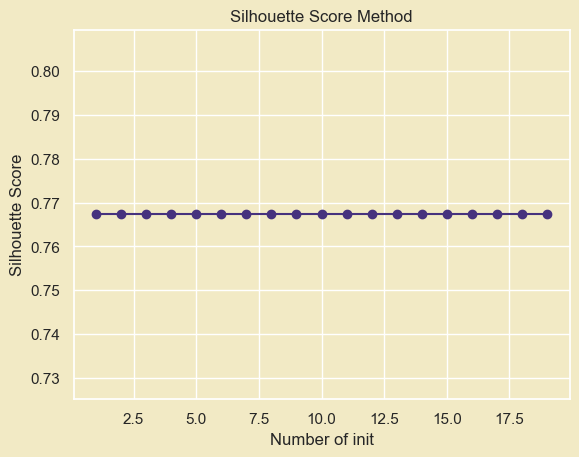

In [61]:
fixed_params['n_clusters'] = 3
fixed_params['random_state'] = 39 
fixed_params['n_init'] = 5

silhouette_scores = []
for n_init in range(1,20):
    indexesKmeans, labels,inertia = KmeansPrediction(inputsong, dfFeatures, dfLabels, number=5, n_clusters=fixed_params["n_clusters"] , random_state=fixed_params["random_state"], n_init=fixed_params["n_init"])

    silhouette = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette)

# Plotting the Silhouette scores
plt.plot(range(1, 20), silhouette_scores, marker='o')
plt.xlabel('Number of init')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

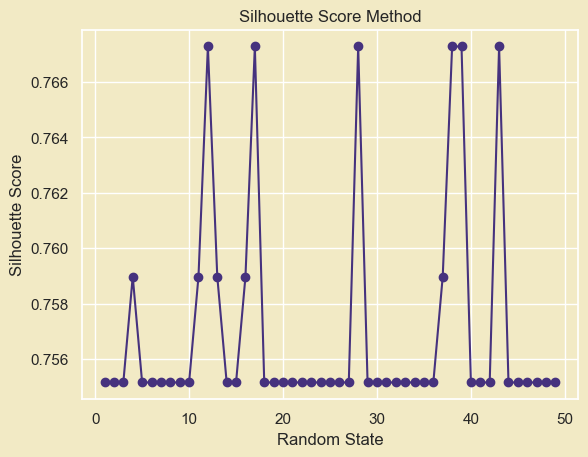

The maximum Silhouette Score: 0.7672775807282871 is achieved at the point random_state: 12


In [62]:
silhouette_scores = []
for random_state in range(1,50):
    indexesKmeans, labels, inertia = KmeansPrediction(inputsong, dfFeatures, dfLabels, number=5, n_clusters=fixed_params["n_clusters"] , random_state=random_state, n_init=fixed_params["n_init"])
    silhouette = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette)

# Plotting the Silhouette scores
plt.plot(range(1, 50), silhouette_scores, marker='o')
plt.xlabel('Random State')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()
max_silhouette_index = np.argmax(silhouette_scores)
max_silhouette_score = max(silhouette_scores)

print(f"The maximum Silhouette Score: {max_silhouette_score} is achieved at the point random_state: {max_silhouette_index + 1}")

# MiniBatchKmeans

In [63]:
def MiniBatchPrediction(inputsong, dfFeatures, dfLabels, n_clusters, numberK, random_state, batch_size,max_iter,tol, reassignment_ratio):
    mbk = MiniBatchKMeans(n_clusters=n_clusters, random_state=random_state, batch_size=batch_size, max_iter=max_iter,tol=tol, reassignment_ratio=reassignment_ratio)
    mbk.fit(dfFeatures)
    
    knn = NearestNeighbors(n_neighbors=numberK)
    input_song_cluster = mbk.predict(inputsong)
    cluster_samples = dfFeatures[mbk.labels_ == input_song_cluster[0]]
    
    if len(cluster_samples) >= numberK:
        knn.fit(cluster_samples)
        distances, indices = knn.kneighbors(inputsong)
    else:
        print("Not enough samples in the cluster to find neighbors.")
        
    indexes = indices[0]
    indexes = indexes[indexes != inputsong.index[0]]
    return indexes, mbk.labels_


In [64]:
fixed_params = {
    'n_clusters': 5,
    'random_state': 5,
    'batch_size': 50,
    'max_iter': 500,
    "tolerance" : 0,
    "reassignment_ratio" : 0.01
}


C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

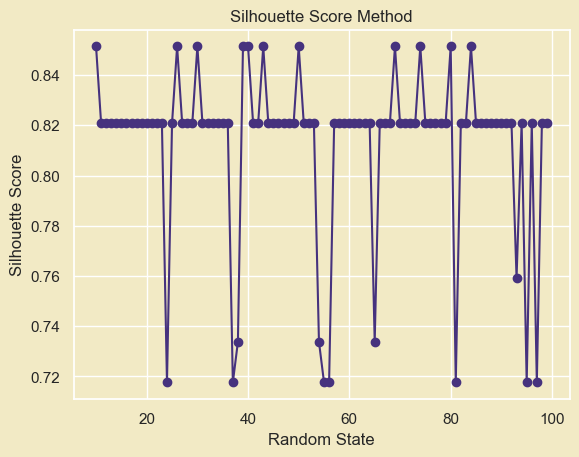

Best Random State: 10
Max Silhouette Score: 0.8514087888941132


In [65]:
silhouette_scores = []
random_states = range(10, 100)

for random_state in random_states:
    indexesKmeans, labels = MiniBatchPrediction(inputsong, dfFeatures, dfLabels, n_clusters=fixed_params["n_clusters"], numberK=5, random_state=random_state, batch_size=fixed_params["batch_size"], max_iter=fixed_params["max_iter"],tol=fixed_params["tolerance"],reassignment_ratio=fixed_params["reassignment_ratio"])

    silhouette = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette)

# Find the random state with the maximum silhouette score
best_random_state = random_states[np.argmax(silhouette_scores)]
max_silhouette_score = np.max(silhouette_scores)

# Plotting the Silhouette scores
plt.plot(random_states, silhouette_scores, marker='o')
plt.xlabel('Random State')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

print(f"Best Random State: {best_random_state}")
print(f"Max Silhouette Score: {max_silhouette_score}")

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

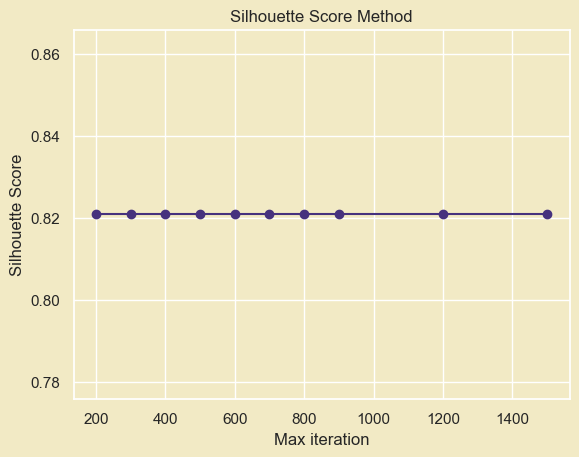

In [66]:
ranges = [200,300,400,500,600,700,800,900,1200,1500]
silhouette_scores = []
for max_iter in ranges:
    indexesKmeans, labels = MiniBatchPrediction(inputsong, dfFeatures, dfLabels, n_clusters=fixed_params["n_clusters"], numberK=5, random_state=fixed_params["random_state"], batch_size=fixed_params["batch_size"], max_iter=max_iter,tol=fixed_params["tolerance"],reassignment_ratio=fixed_params["reassignment_ratio"])
    silhouette = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette)

# Plotting the Silhouette scores
plt.plot(ranges, silhouette_scores, marker='o')
plt.xlabel('Max iteration')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

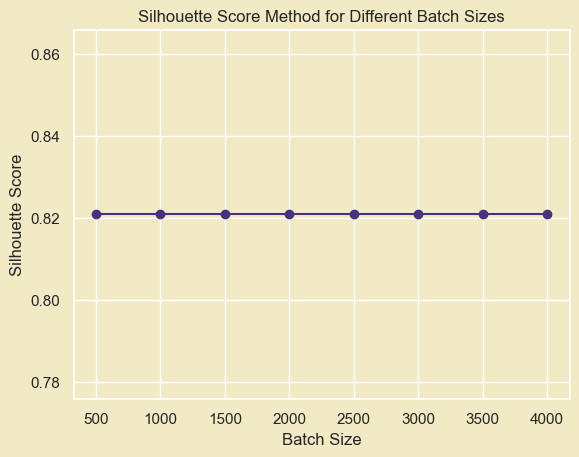

In [67]:
batch_sizes = [500,1000,1500,2000,2500,3000,3500,4000]
silhouette_scores = []
for batch_size in batch_sizes:
    indexesKmeans, labels = MiniBatchPrediction(inputsong, dfFeatures, dfLabels,
                                               n_clusters=fixed_params["n_clusters"],
                                               numberK=5,
                                               random_state=fixed_params["random_state"],
                                               batch_size=batch_size,
                                               max_iter=fixed_params["max_iter"],
                                               tol=fixed_params["tolerance"],
                                               reassignment_ratio=fixed_params["reassignment_ratio"])
    silhouette = silhouette_score(dfFeatures, labels)
    silhouette_scores.append(silhouette)

# Plotting the Silhouette scores
plt.plot(batch_sizes, silhouette_scores, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Different Batch Sizes')
plt.show()

C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\furkngoksu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMean

Best Silhouette Score: 0.8208242544357348
Best Parameters: Tolerance: 0.1, Reassignment Ratio: 0.1


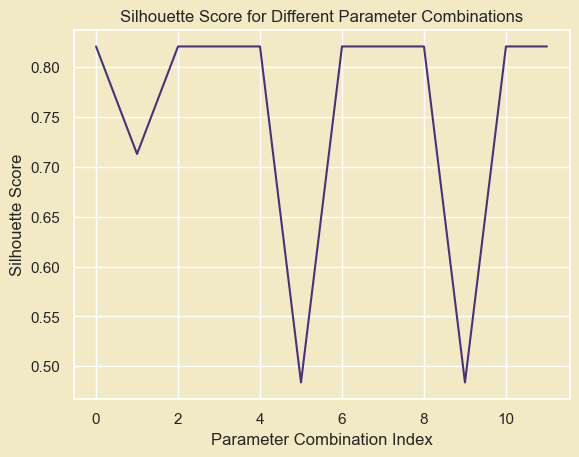

In [68]:
tolerances = [0.1, 0.01,0]
reassignment_ratios = [0.1, 0.5,.01,0.001]

# Silhouette skorlarını saklamak için boş bir liste oluşturun
silhouette_scores = []

# Farklı parametre kombinasyonlarını deneyin
for tol in tolerances:
    for reassignment_ratio in reassignment_ratios:
        indexesMiniBatch, labels = MiniBatchPrediction(inputsong, dfFeatures, dfLabels,
                                                                  n_clusters=5, numberK=5,
                                                                  random_state=fixed_params["random_state"],
                                                                  batch_size=fixed_params["batch_size"], max_iter=fixed_params["max_iter"],
                                                                  tol=tol, reassignment_ratio=reassignment_ratio)

        silhouette = silhouette_score(dfFeatures, labels)
        silhouette_scores.append(silhouette)

# En iyi Silhouette skorunu ve parametre kombinasyonunu yazdırın
best_score_index = np.argmax(silhouette_scores)
best_tol = tolerances[(best_score_index // len(reassignment_ratios)) % len(tolerances)]
best_reassignment_ratio = reassignment_ratios[best_score_index % len(reassignment_ratios)]

print(f"Best Silhouette Score: {max(silhouette_scores)}")
print(f"Best Parameters: Tolerance: {best_tol}, Reassignment Ratio: {best_reassignment_ratio}")

# Silhouette skorlarını görselleştirin
plt.plot(range(len(silhouette_scores)), silhouette_scores)
plt.xlabel('Parameter Combination Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Parameter Combinations')
plt.show()

In [ ]:
indexesMiniBatch, labels = MiniBatchPrediction(inputsong, dfFeatures, dfLabels,
                                                                  fixed_params["n_clusters"]=5, numberK=5,
                                                                  random_state=fixed_params["random_state"],
                                                                  batch_size=fixed_params["batch_size"], max_iter=fixed_params["max_iter"],
                                                                  tol=fixed_params["tolerance"], reassignment_ratio=fixed_params["reassignment_ratio"])

       
ClosestSongs = pd.DataFrame()

for i in indexesMiniBatch:
    temp = dfSelection[dfSelection.index == i]
    ClosestSongs = pd.concat([temp, ClosestSongs])